### Importing Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.decomposition import PCA
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.neighbors import LocalOutlierFactor

import warnings
warnings.filterwarnings("ignore")

In [16]:
df = pd.read_csv("data.csv")

# Data Exploration

In [ ]:
df.head()

In [18]:
df.head().T

,0,1,2,3,4
Income,44637.249636,26858.596592,50367.605084,101455.600247,24875.283548
Age,49,34,35,21,52
Dependents,0,2,1,0,4
Occupation,Self_Employed,Retired,Student,Self_Employed,Professional
City_Tier,Tier_1,Tier_2,Tier_3,Tier_3,Tier_2
Rent,13391.174891,5371.719318,7555.140763,15218.340037,4975.05671
Loan_Repayment,0.0,0.0,4612.103386,6809.441427,3112.609398
Insurance,2206.490129,869.522617,2201.80005,4889.418087,635.90717
Groceries,6658.768341,2818.44446,6313.222081,14690.149363,3034.329665
Transport,2636.970696,1543.018778,3221.396403,7106.130005,1276.155163


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

In [1]:
# the data appears to be clean

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,20000.0,41585.496104,40014.540538,1301.187333,17604.875957,30185.383480,51765.446460,1.079728e+06
Age,20000.0,41.031450,13.578725,18.000000,29.000000,41.000000,53.000000,6.400000e+01
Dependents,20000.0,1.995950,1.417616,0.000000,1.000000,2.000000,3.000000,4.000000e+00
Rent,20000.0,9115.494629,9254.228188,235.365692,3649.422246,6402.751824,11263.940492,2.159457e+05
Loan_Repayment,20000.0,2049.800292,4281.789941,0.000000,0.000000,0.000000,2627.142320,1.230807e+05
Insurance,20000.0,1455.028761,1492.938435,30.002012,580.204749,1017.124681,1787.160895,3.873493e+04
Groceries,20000.0,5205.667493,5035.953689,154.078240,2165.426419,3741.091535,6470.892718,1.198169e+05
Transport,20000.0,2704.466685,2666.345648,81.228584,1124.578012,1933.845509,3360.597508,8.186150e+04
Eating_Out,20000.0,1461.856982,1481.660811,39.437523,581.011801,1029.109726,1807.075251,3.440610e+04
Entertainment,20000.0,1448.853658,1489.019270,45.421469,581.632906,1020.198376,1790.104082,3.866737e+04


# Univariate Analysis

## Income Distribution

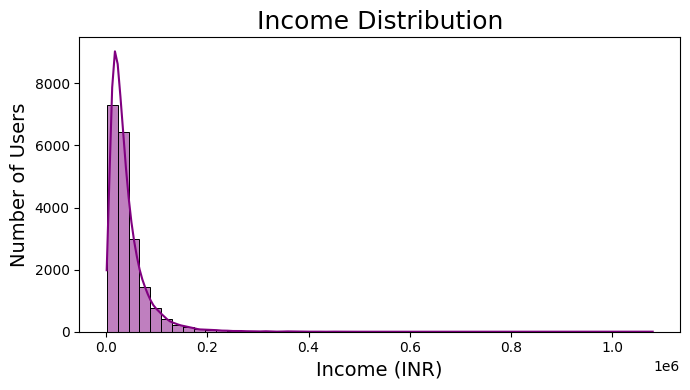

In [21]:
plt.figure(figsize=(7, 4))
sns.histplot(df['Income'], bins=50, kde=True, color='purple')
plt.title('Income Distribution', fontsize=18)
plt.xlabel('Income (INR)', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# The graph is right skewed indicating most of the people have incomes on the lower end and as the income increases the density of population decreases.

## Age Distribution

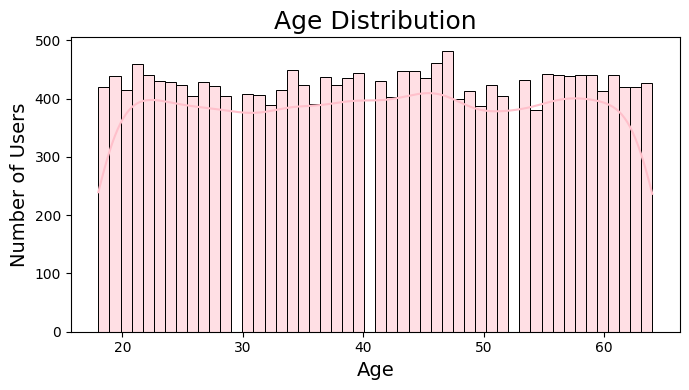

In [22]:
plt.figure(figsize=(7, 4))
sns.histplot(df['Age'], bins=50, kde=True, color='pink')
plt.title('Age Distribution', fontsize=18)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# This indicates that our data is collected from the ages of 20-60 uniformly

## City Tier Distribution

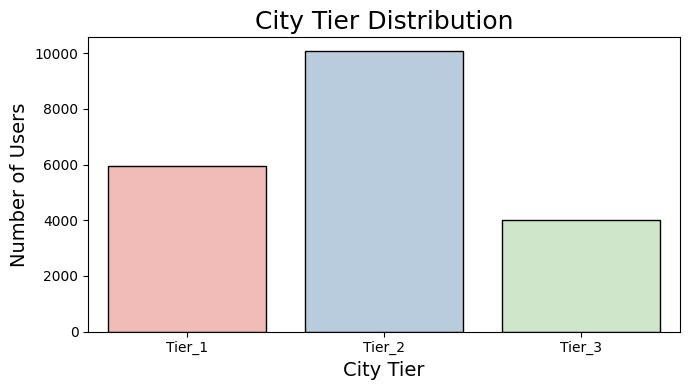

In [23]:
plt.figure(figsize=(7, 4))
sns.countplot(x='City_Tier', data=df, palette='Pastel1', edgecolor='black')
plt.title('City Tier Distribution', fontsize=18)
plt.xlabel('City Tier', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# This indicates our data is majorly collected from the users of Tier-2 cities

# Expense Analysis

## Fixed Expenses

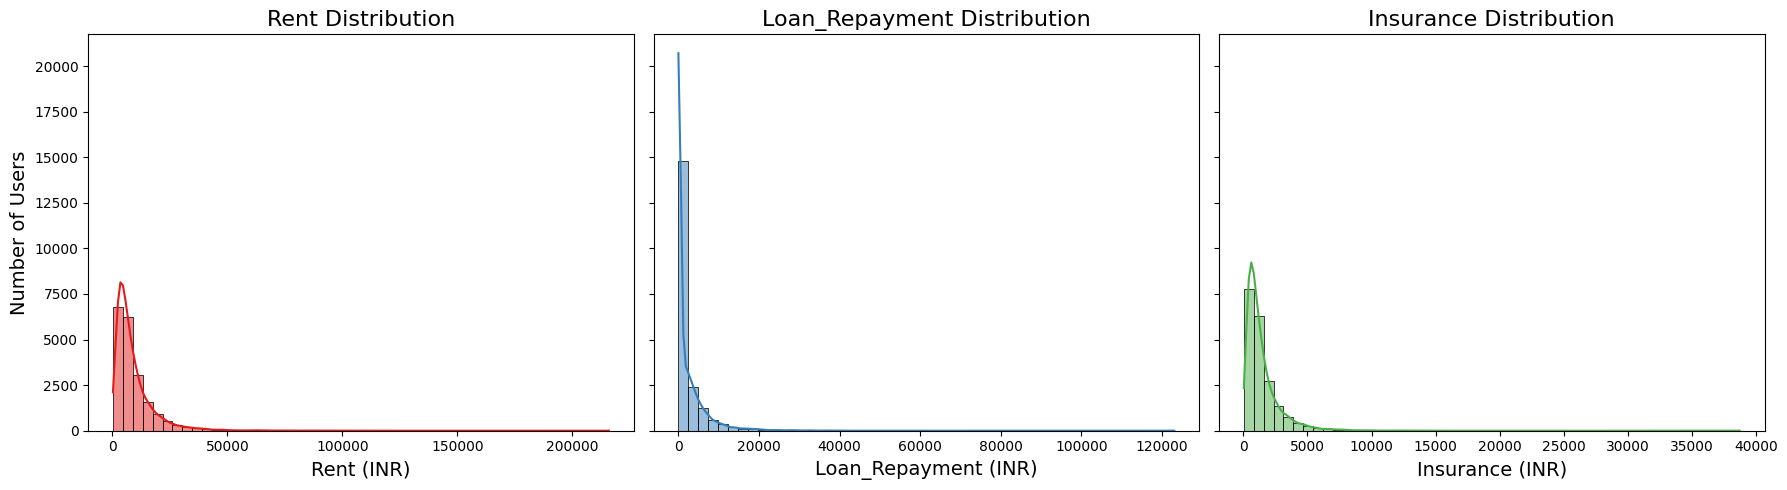

In [24]:
fixed_expenses = ['Rent', 'Loan_Repayment', 'Insurance']
num_fixed = len(fixed_expenses)

fixed_palette = sns.color_palette("Set1", num_fixed)

fig, axes = plt.subplots(1, num_fixed, figsize=(18, 5), sharey=True)

for ax, expense, color in zip(axes, fixed_expenses, fixed_palette):
    sns.histplot(df[expense], bins=50, kde=True, color=color, ax=ax)
    ax.set_title(f'{expense} Distribution', fontsize=16)
    ax.set_xlabel(f'{expense} (INR)', fontsize=14)
    ax.set_ylabel('Number of Users', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
""" 
Observations:
Rent Distribution:
- The majority of users pay a relatively low rent, with a sharp peak at lower rent values (likely below 20,000 INR).
- The distribution is right-skewed, with a small number of users paying higher rents, extending up to 200,000 INR.
- This could suggest that a significant portion of users live in less expensive regions or that housing affordability varies widely, possibly due to 
  differences between urban and rural areas.

Loan Repayment Distribution:
- A prominent spike at or near zero indicates that a substantial proportion of users have no loan repayment obligations.
- For those with loan repayments, the amounts are relatively low, with a rapid decline in the number of users as repayment amounts increase.
-The overall distribution is highly right-skewed, showing that few users have high monthly loan repayments (up to 120,000 INR).

Insurance Distribution:
- Insurance premiums are generally low, with the majority of users paying minimal amounts (likely below 5,000 INR).
- Similar to the other distributions, this data is also right-skewed, indicating that while most users pay small amounts for insurance, a few pay 
  significantly higher premiums, extending up to 40,000 INR.
- This suggests that a large proportion of users may have basic or minimal insurance coverage, with fewer opting for comprehensive or higher-value plans.
"""

## Variable Expenditure

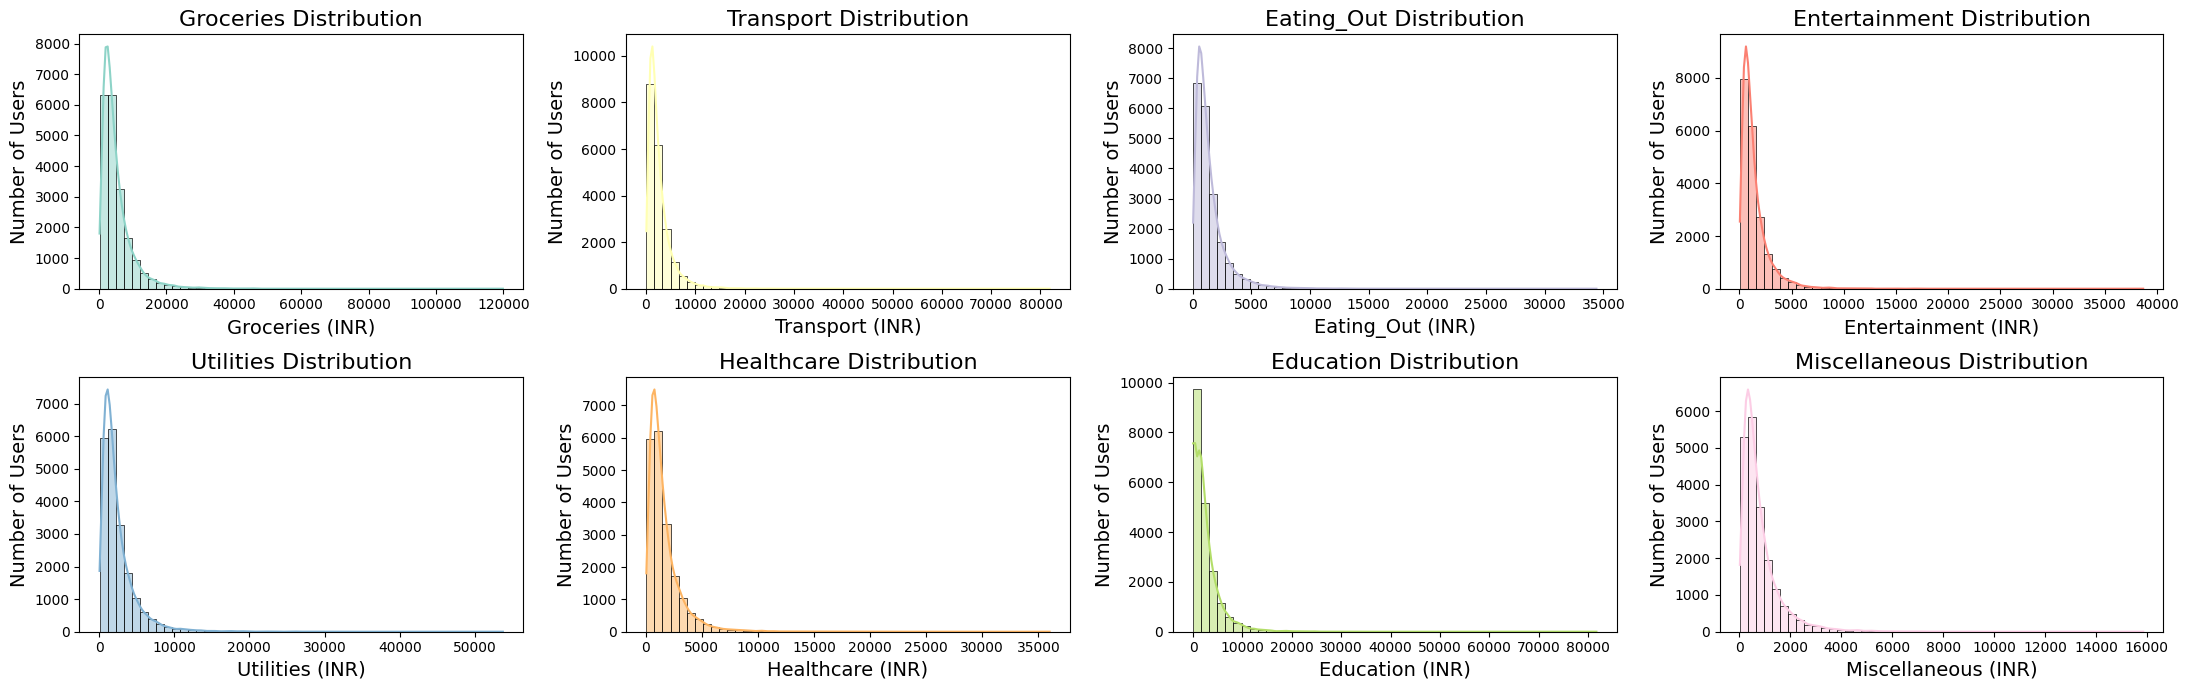

In [25]:
variable_expenses = [
    'Groceries', 'Transport', 'Eating_Out', 'Entertainment',
    'Utilities', 'Healthcare', 'Education', 'Miscellaneous'
]
num_variable = len(variable_expenses)

variable_palette = sns.color_palette("Set3", num_variable)

fig, axes = plt.subplots(2, 4, figsize=(22, 7))
axes = axes.flatten()

for ax, expense, color in zip(axes, variable_expenses, variable_palette):
    sns.histplot(df[expense], bins=50, kde=True, color=color, ax=ax)
    ax.set_title(f'{expense} Distribution', fontsize=16)
    ax.set_xlabel(f'{expense} (INR)', fontsize=14)
    ax.set_ylabel('Number of Users', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
"""
Observations:
- Groceries: Most users spend less than 20,000 INR on groceries, with a few outliers spending significantly more. This indicates that the majority of
  users maintain moderate grocery expenses.
- Transport: The majority of users have transport expenses below 10,000 INR, with a sharp decline beyond this point, suggesting limited high transport 
  expenditures among users.
- Eating Out: Most users spend below 5,000 INR on eating out, with a few spending more, indicating that dining out is not a significant expense for
  most.
- Entertainment: Entertainment expenses are generally below 5,000 INR, with the majority of users spending minimal amounts in this category, reflecting
  lower discretionary spending.
- Utilities: Users primarily have utility expenses under 10,000 INR, with a few outliers, suggesting stable and predictable utility costs for most.
- Healthcare: Healthcare expenses are generally low, with most users spending less than 5,000 INR, indicating limited spending on medical needs among
  the majority.
- Education: Education-related expenses are primarily below 10,000 INR, indicating that high educational costs are rare among users.
- Miscellaneous: Most users have miscellaneous expenses below 2,000 INR, with a few higher expenditures, indicating that additional unclassified
  expenses are typically small.

Each of these expense categories shows a right-skewed distribution, with the majority of users having relatively low expenditures and a smaller number 
spending significantly more. This suggests that while most users manage their expenses conservatively, there are outliers with higher spending in each category.
"""

# Savings Analysis

## Desired Savings VS Income

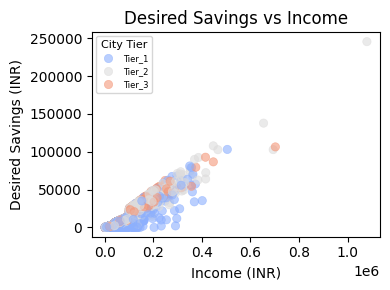

In [26]:
plt.figure(figsize=(4, 3))
sns.scatterplot(
    data=df,
    x='Income',
    y='Desired_Savings',
    hue='City_Tier',
    palette='coolwarm',
    alpha=0.6,
    edgecolor=None
)
plt.title('Desired Savings vs Income', fontsize=12)
plt.xlabel('Income (INR)', fontsize=10)
plt.ylabel('Desired Savings (INR)', fontsize=10)
plt.legend(title='City Tier', fontsize=6, title_fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
"""
Observations:
- There is a positive correlation between income and desired savings, with higher incomes leading to higher savings goals.
- Users across all city tiers follow similar savings trends, but higher-income users show more variability in their savings.
- Most users are concentrated at lower income levels, with a few outliers having significantly higher incomes and desired savings.
"""

## Potential Savings Across Categories

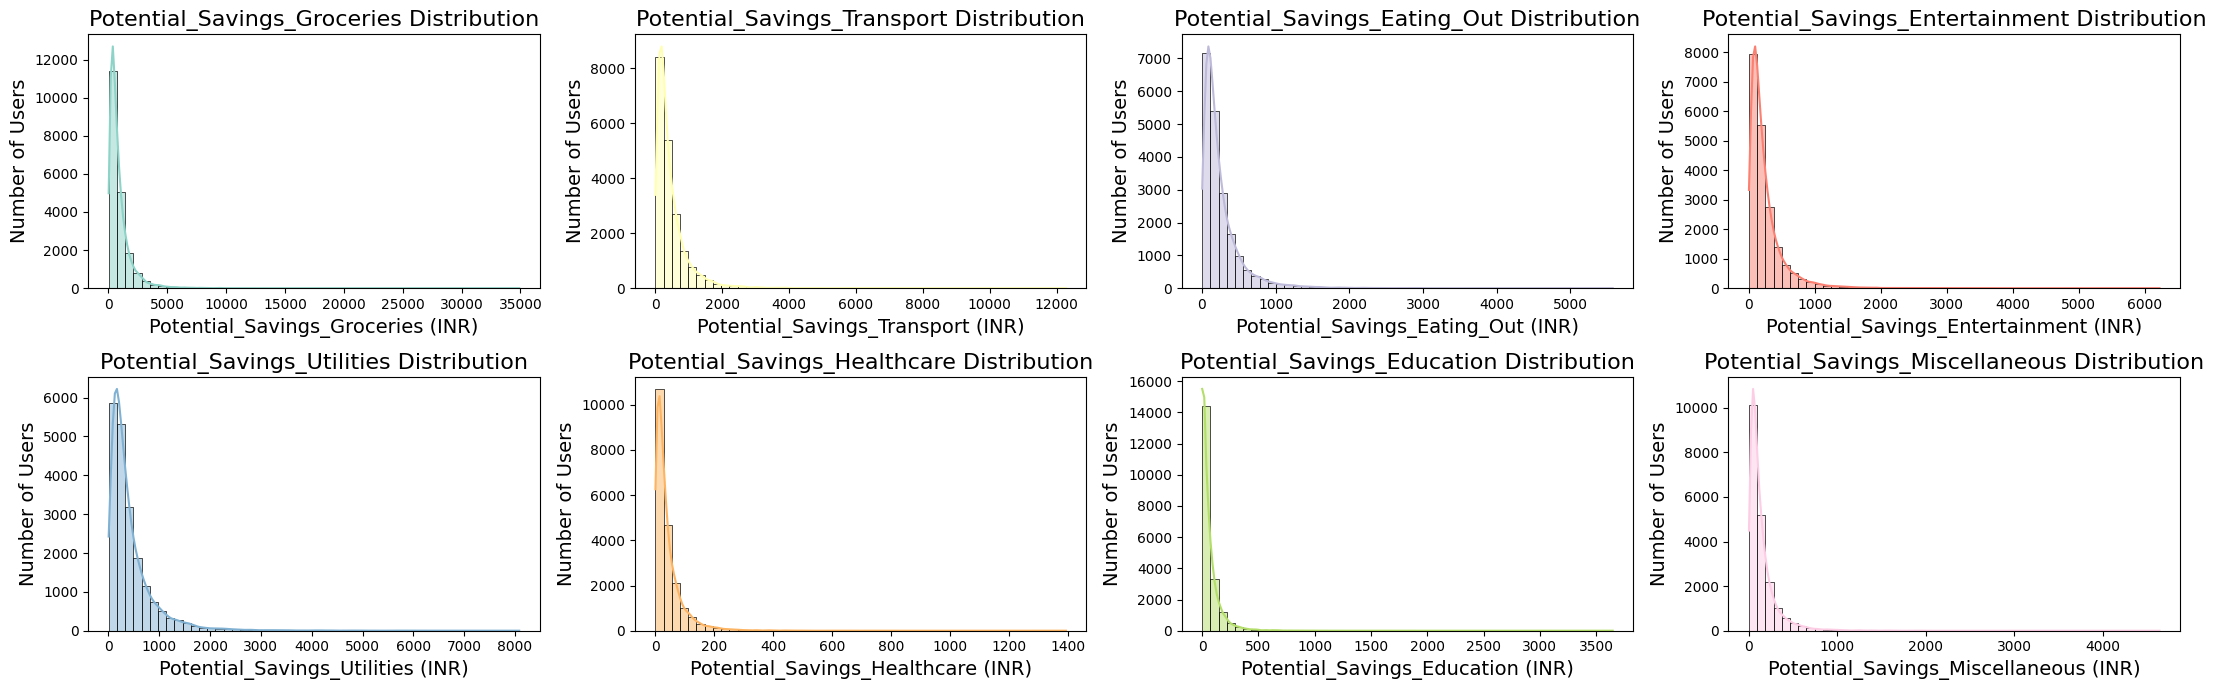

In [27]:
potential_savings_columns = [col for col in df.columns if col.startswith('Potential_Savings')]

num_potential = len(potential_savings_columns)
palette_potential = sns.color_palette("Set3", num_potential)

fig, axes = plt.subplots(2, 4, figsize=(22, 7))
axes = axes.flatten()

for ax, column, color in zip(axes, potential_savings_columns, palette_potential):
    sns.histplot(df[column], bins=50, kde=True, color=color, ax=ax)
    ax.set_title(f'{column} Distribution', fontsize=16)
    ax.set_xlabel(f'{column} (INR)', fontsize=14)
    ax.set_ylabel('Number of Users', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
"""
Observations:
- Potential Savings Distribution: Across all expense categories, potential savings are highly skewed towards lower values, indicating that most users
  have limited savings potential in each category.
- Groceries and Transport: These categories show relatively higher potential savings compared to others, suggesting room for users to optimize spending
  in these areas.
- Healthcare and Education: Potential savings are minimal, reflecting the essential nature of these expenses, where users have less flexibility to cut
  costs.
"""

# Correlation Analysis

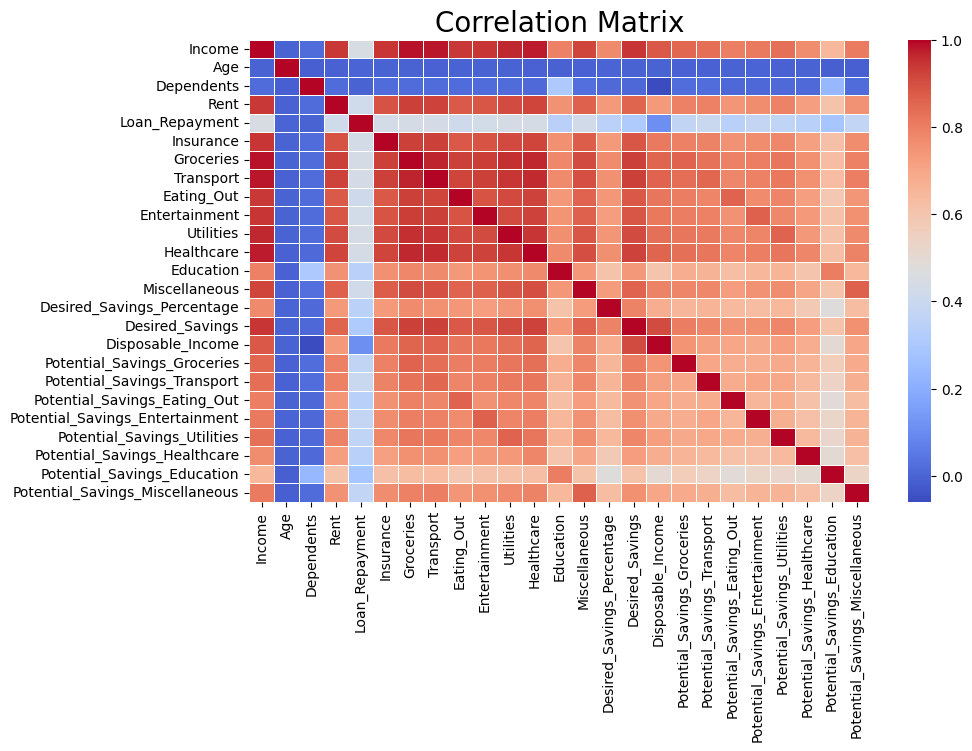

In [28]:
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=20)
plt.show()

In [ ]:
"""
Observations:
- Income Correlations: Income shows a strong positive correlation with expenses like rent, loan repayment, and insurance, indicating that higher
  earners tend to spend more on these fixed costs.
- Desired Savings: Desired savings correlate positively with income and disposable income, suggesting that as income increases, so do savings goals.
- Expense Relationships: There are strong correlations among different expense categories (e.g., groceries, transport, and utilities), reflecting that
  higher spending in one area is often associated with increased spending in others.
"""

# Cluster based on Financial Profiles

In [29]:
financial_features = ['Income', 'Disposable_Income', 'Rent', 'Loan_Repayment']

financial_data = df[financial_features]
scaler = StandardScaler()
financial_data_scaled = scaler.fit_transform(financial_data)
inertia = []
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(financial_data_scaled)
    inertia.append(kmeans.inertia_)

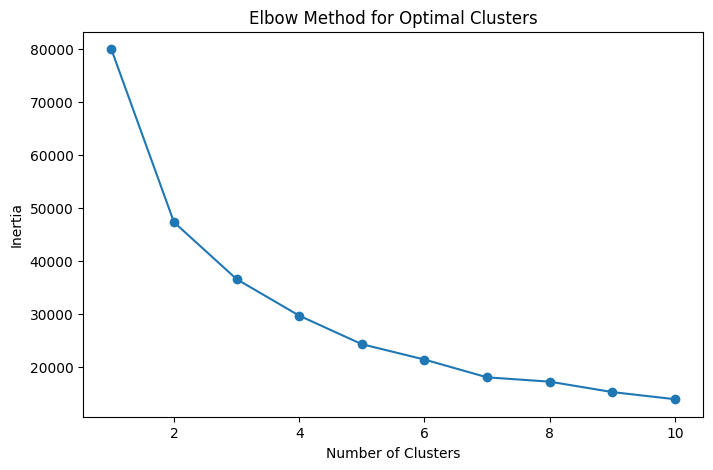

In [30]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
""" Here we can see the elbow lies around 4 making it the optimal number of clusters

In [31]:
optimal_clusters = 4  

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Financial_Profile_Cluster'] = kmeans.fit_predict(financial_data_scaled)
cluster_summary = df.groupby('Financial_Profile_Cluster')[financial_features].mean()

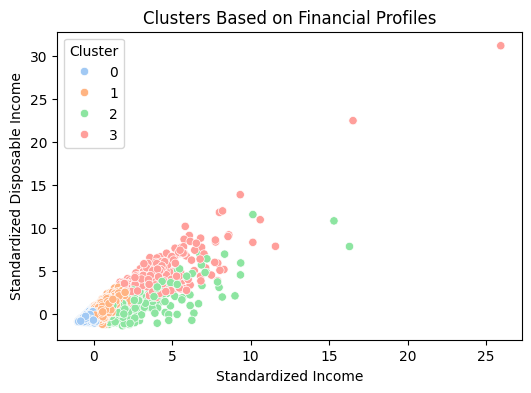

In [32]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x=financial_data_scaled[:, 0], 
    y=financial_data_scaled[:, 1], 
    hue=df['Financial_Profile_Cluster'], 
    palette='pastel'
)
plt.title('Clusters Based on Financial Profiles')
plt.xlabel('Standardized Income')
plt.ylabel('Standardized Disposable Income')
plt.legend(title='Cluster')
plt.show()

In [ ]:
""" The clusters are not visible and the graph looks a bit chaotic due to the presence of outliers 

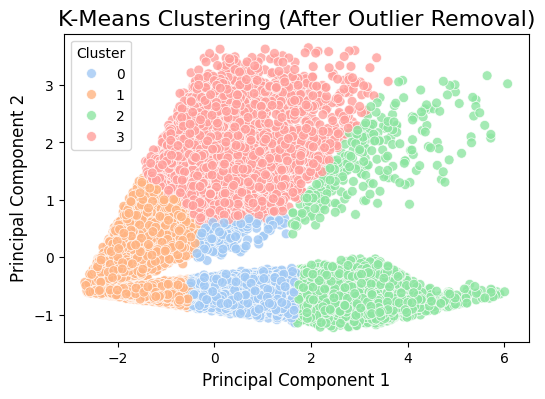

In [44]:
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data
outlier_columns = ['Income', 'Disposable_Income', 'Rent', 'Loan_Repayment']
df_cleaned = remove_outliers_iqr(df, outlier_columns)
features = df_cleaned[['Income', 'Disposable_Income', 'Rent', 'Loan_Repayment']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
df_cleaned['Financial_Profile_Cluster'] = kmeans.fit_predict(scaled_features)

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Add PCA components to the dataframe
df_cleaned['PCA1'] = reduced_features[:, 0]
df_cleaned['PCA2'] = reduced_features[:, 1]

# Step 5: Plot the clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x='PCA1', y='PCA2', 
    hue='Financial_Profile_Cluster', 
    palette='pastel', 
    data=df_cleaned,
    s=50, alpha=0.8
)

plt.title('K-Means Clustering (After Outlier Removal)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()


In [43]:
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
                                  Income  Disposable_Income          Rent  \
Financial_Profile_Cluster                                                   
0                           23020.139099        5824.075116   5026.090654   
1                           67136.454695       17910.779564  14779.358192   
2                          137471.347288       22213.529234  30426.382067   
3                          173518.054530       53111.932857  37668.073334   

                           Loan_Repayment  
Financial_Profile_Cluster                  
0                             1170.326791  
1                             2612.318166  
2                            19611.222086  
3                              643.700263  


In [ ]:
"""
Observations:
- Income and Disposable Income Relationship: Higher income does not always lead to higher disposable income, as seen in Cluster 2, where high rent and
  loan repayments significantly reduce savings potential.
- Rent Burden: Rent is a major expense across clusters, with Cluster 2 spending the largest proportion of income on rent, causing financial strain
  despite high earnings.
- Loan Repayment Impact: Cluster 2 faces the highest loan repayment burden, indicating potential financial stress, while Cluster 3 enjoys minimal loan
  liabilities.
- Cluster Distinction:
   *Cluster 0: Low-income, minimal disposable income, and moderate expenses.
   *Cluster 1: Moderate-income, with substantial rent costs and manageable loans.
   *Cluster 2: High-income but struggling with fixed expenses (rent and loans).
   *Cluster 3: Very high-income, high disposable income, and financially stable.
- Actionable Insights: Clusters 0 and 1 need strategies for expense management and savings growth, Cluster 2 requires debt and rent optimization, while
  Cluster 3 can focus on investment and wealth-building opportunities.

# Outlier Analysis

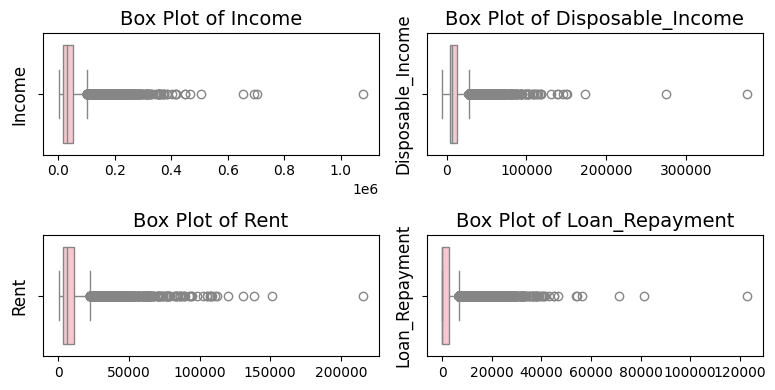

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

outlier_columns = ['Income', 'Disposable_Income', 'Rent', 'Loan_Repayment']

plt.figure(figsize=(8, 4))
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(data=df, x=col, color='pink')
    plt.title(f'Box Plot of {col}', fontsize=14)
    plt.xlabel('')
    plt.ylabel(col, fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
"""
Observations -
- Income Distribution: Most income values are concentrated in the lower range, but there are significant outliers with exceptionally high incomes,
  potentially indicating high earners or distinct financial profiles.
- Disposable Income: Similar to income, disposable income has a dense lower range with notable high-value outliers, reflecting individuals with
  substantial discretionary spending capacity.
- Rent Patterns: Rent values are predominantly within a specific range, but a few high outliers suggest individuals in premium housing or regions with
  higher rental costs.
- Loan Repayment: Loan repayment amounts show fewer outliers compared to income or rent but still indicate individuals with unusually high loan
  obligations or repayments.
- General Skewness: All features exhibit heavy skewness, with clusters of values near the lower range and extreme outliers at the upper end, which
  could influence clustering and other analyses if not addressed.

# Risk Profiling

In [36]:
df['Savings'] = df['Disposable_Income'] - df['Rent'] - df['Loan_Repayment']
df['Debt_to_Income'] = df['Loan_Repayment'] / df['Income']
df['Rent_to_Income'] = df['Rent'] / df['Income']

def risk_profile(row):
    if row['Savings'] < 0 or row['Debt_to_Income'] > 0.4 or row['Rent_to_Income'] > 0.5:
        return 'Low Risk'
    elif row['Savings'] > 5000 and row['Debt_to_Income'] <= 0.4:
        return 'Moderate Risk'
    elif row['Savings'] > 20000 and row['Debt_to_Income'] <= 0.2:
        return 'High Risk'
    else:
        return 'Moderate Risk'

df['Risk_Profile'] = df.apply(risk_profile, axis=1)
risk_summary = df['Risk_Profile'].value_counts()
print("Risk Profile Summary:")
print(risk_summary)

Risk Profile Summary:
Risk_Profile
Low Risk         10271
Moderate Risk     9729
Name: count, dtype: int64


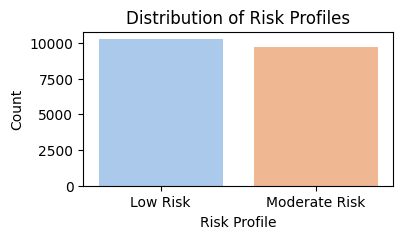

In [37]:
plt.figure(figsize=(4, 2))
sns.countplot(data=df, x='Risk_Profile', palette='pastel')
plt.title('Distribution of Risk Profiles')
plt.xlabel('Risk Profile')
plt.ylabel('Count')
plt.show()

In [ ]:
"""
Observations: 
- Dominance of Low-Risk Individuals: The majority (10,271) fall into the Low-Risk category, indicating widespread financial vulnerability due to low
  savings or high debt-to-income ratios.
- Substantial Moderate-Risk Group: A sizable portion (9,729) is classified as Moderate Risk, showing a relatively stable financial position but still
  facing constraints in savings or debt management.
- Lack of High-Risk Individuals: No individuals are categorized as High Risk, which may suggest that few have the capacity or inclination for high-risk 
  financial behaviors.
- Financial Strain is Prevalent: The dataset shows that most individuals are in Low or Moderate Risk categories, suggesting a general trend of
  financial strain and limited disposable income.
- Debt and Savings Influence Risk: The classification highlights that high debt and low savings are the primary factors driving individuals into the
  Low and Moderate Risk categories.